In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
file_path = '../dane/data_collection_20231202114746.csv' # ostatni strzał zerwany
df = pd.read_csv(file_path)

print(df.head())


   Index   V1   V2  Noise
0      0  337  282    313
1      1  345  278    290
2      2  354  279    283
3      3  365  295    291
4      4  377  313    303


Pokaz dla próbki, w której piąty strzał jest zerwany

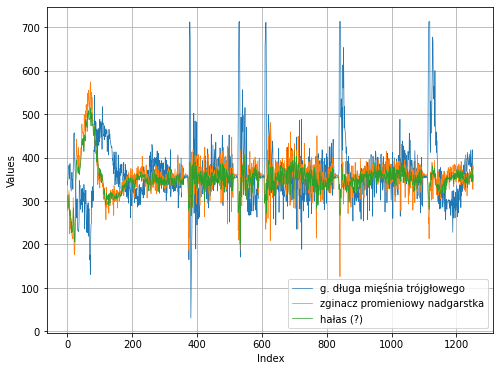

In [8]:
plt.figure(figsize=(8, 6))  

plt.plot(df['Index'], df['V1'], label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.plot(df['Index'], df['V2'], label='Zginacz promieniowy nadgarstka', linewidth=0.7)
plt.plot(df['Index'], df['Noise'], label='Szum', linewidth=0.7)

plt.xlabel('Index')
plt.ylabel('Values')

plt.legend() 
plt.grid()  
plt.show()


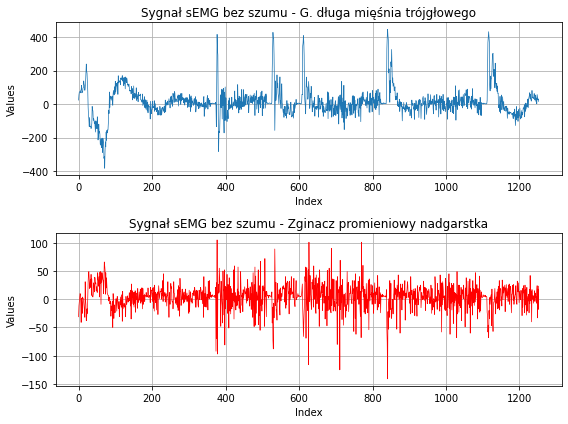

In [17]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Index'], df['V1'] - df['Noise'], label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Sygnał sEMG bez szumu - G. długa mięśnia trójgłowego')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df['Index'], df['V2'] - df['Noise'], label='Zginacz promieniowy nadgarstka', linewidth=0.7, color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Sygnał sEMG bez szumu - Zginacz promieniowy nadgarstka')
plt.grid()

plt.tight_layout()
plt.show()

In [20]:
import numpy as np

channel_1 = df['V1'] - df['Noise']
channel_2 = df['V2'] - df['Noise']

mean_channel_1 = channel_1.mean()
median_channel_1 = channel_1.median()
std_channel_1 = channel_1.std()

rms_channel_1 = np.sqrt(np.mean(np.square(channel_1)))

mean_channel_2 = channel_2.mean()
median_channel_2 = channel_2.median()
rms_channel_2 = np.sqrt(np.mean(np.square(channel_2)))

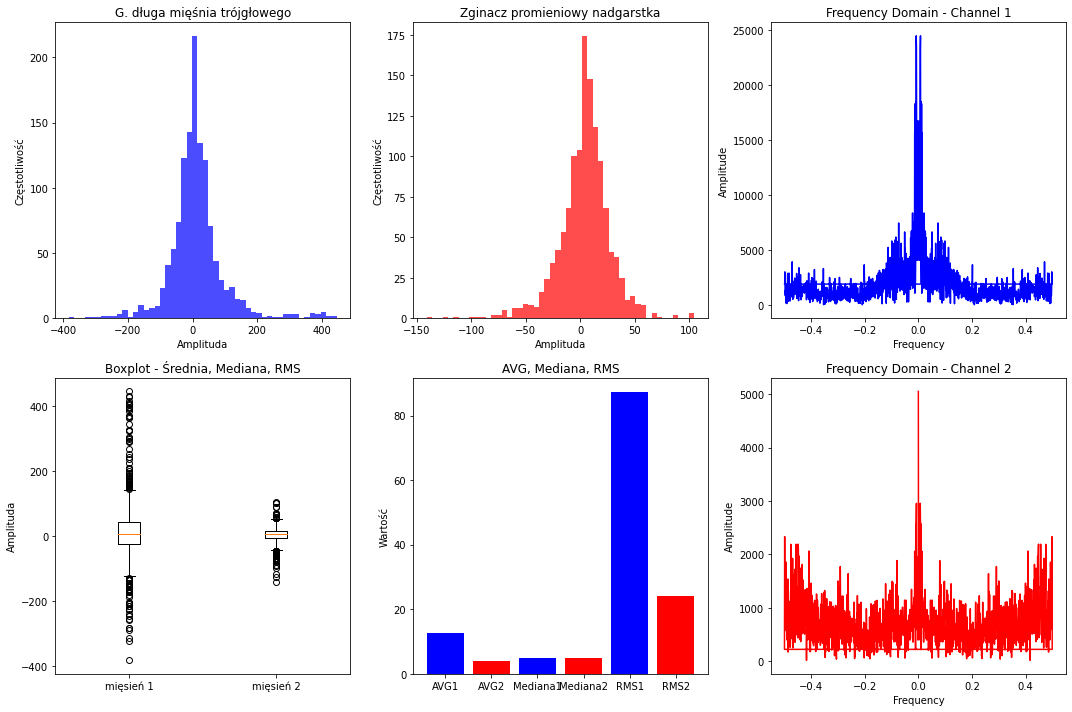

In [21]:

fft_channel_1 = np.fft.fft(channel_1)
fft_channel_2 = np.fft.fft(channel_2)
frequency_1 = np.fft.fftfreq(len(channel_1))
frequency_2 = np.fft.fftfreq(len(channel_2))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# histogramy
axes[0, 0].hist(channel_1, bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('G. długa mięśnia trójgłowego')
axes[0, 0].set_xlabel('Amplituda')
axes[0, 0].set_ylabel('Częstotliwość')

axes[0, 1].hist(channel_2, bins=50, alpha=0.7, color='red')
axes[0, 1].set_title('Zginacz promieniowy nadgarstka')
axes[0, 1].set_xlabel('Amplituda')
axes[0, 1].set_ylabel('Częstotliwość')

# boxploty
data = [channel_1, channel_2]
labels = ['mięsień 1', 'mięsień 2']
axes[1, 0].boxplot(data, labels=labels)
axes[1, 0].set_title('Boxplot - Średnia, Mediana, RMS')
axes[1, 0].set_ylabel('Amplituda')

# słupkowe
statistics = [mean_channel_1, mean_channel_2, median_channel_1, median_channel_2, rms_channel_1, rms_channel_2]
labels = ['AVG1', 'AVG2', 'Mediana1', 'Mediana2', 'RMS1', 'RMS2']
axes[1, 1].bar(labels, statistics, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
axes[1, 1].set_title('AVG, Mediana, RMS')
axes[1, 1].set_ylabel('Wartość')

# Transformata Fouriera
axes[0, 2].plot(frequency_1, np.abs(fft_channel_1), color='blue')
axes[0, 2].set_title('Transformata Fouriera - mięsień 1')
axes[0, 2].set_xlabel('Częstotliwość')
axes[0, 2].set_ylabel('Amplituda')

axes[1, 2].plot(frequency_2, np.abs(fft_channel_2), color='red')
axes[1, 2].set_title('Transformata Fouriera - mięsień 2')
axes[1, 2].set_xlabel('Częstotliwość')
axes[1, 2].set_ylabel('Amplituda')

plt.tight_layout()
plt.show()

In [31]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

file_path = '../audio/212-1208-7.aac'
audio = AudioSegment.from_file(file_path, format="aac")
audio_data = np.array(audio.get_array_of_samples())

duration = len(audio_data) / audio.frame_rate
time = np.linspace(0, duration, len(audio_data))

plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.grid(True)
plt.show()


C:\Python310\lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file (replace 'your_audio_file.aac' with your file)
audio_file = '../audio/212-1145-5.aac'

# Load the audio data and sampling rate using librosa
audio_data, sr = librosa.load(audio_file)

# Calculate the duration of the audio in seconds
duration = librosa.get_duration(y=audio_data, sr=sr)

# Display the waveform of the audio signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sr)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# Calculate the Short-Time Fourier Transform (STFT) of the audio signal
D = librosa.stft(audio_data)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Display the Spectrogram of the audio signal
plt.figure(figsize=(10, 4))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Calculate and plot the Mel-Frequency Cepstral Coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.show()

# Calculate and display the Zero Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(audio_data)
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(zcr[0])) * len(audio_data) / len(zcr[0]), zcr[0])
plt.title('Zero Crossing Rate (ZCR)')
plt.xlabel('Time (samples)')
plt.ylabel('ZCR')
plt.show()

C:\Users\tomek\AppData\Local\Temp/ipykernel_25988/347049043.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(audio_file)


NoBackendError: 